In [27]:
import numpy as np

In [28]:
import matplotlib.pyplot as plt

In [29]:
# 回転行列
def rotation_matrix(kx, ky, kz, t, l):
    identity_matrix = np.identity(3)
    matrices = []
    for i in range(l):
        R = np.array([[0, -kz, ky], [kz, 0, -kx], [-ky, kx, 0]])
        theta = np.radians(t * i)
        rot_mat = identity_matrix + np.sin(theta) * R + (1 - np.cos(theta)) * np.dot(R, R)
        matrices.append(rot_mat)
    return matrices

kx = 0
ky = 0
kz = 1
l = 3
t = 120

R = rotation_matrix(kx, ky, kz, t, l)

h = np.array([[-6.11747641e-01, 3.91896056e-01, 2.19851586e-01, -6.11747641e-01], [0.00000000e+00, -8.59170967e-0, 8.59170967e-0, 2.42990788e-16], [7.91052984e-01, -3.29002630e-01, -4.62050354e-01, 7.91052984e-01]])
K = np.array([[0.1, 0.1, 0.1], [0.1, 0.1, 0.1], [0.1, 0.1, 0.1]])

ValueError: x and y must have same first dimension, but have shapes (100,) and (4,)

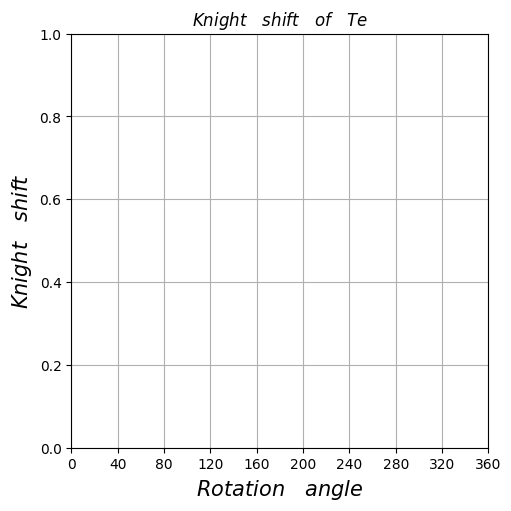

In [30]:
# プロットの設定
fig, axes = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)
axes.set_title(r"$Knight \quad shift \quad of \quad Te$")
axes.set_xlabel(r"$Rotation \quad angle$", fontsize=15)
axes.set_ylabel(r"$Knight \quad shift$", fontsize=15)
axes.set_xlim([0, 360])
axes.set_xticks(np.linspace(0, 360, 10))
axes.grid()

x = np.linspace(0, 360, 100)

def calculate_knight_shift(R, h, K):
    K_rot_values = []
    for j in range(len(h[0])):
        h_vec = np.array([h[0][j], h[1][j], h[2][j]])
        K_rot = np.dot(h_vec.T, np.dot(R, np.dot(K, np.dot(np.linalg.inv(R), h_vec))))
        K_rot_values.append(K_rot)
    return K_rot_values

colors = np.random.rand(l, l)

# プロット
for i in range(l):
    K = np.random.uniform(1e-4, 1e-2, (3, 3))
    K_rot_values = calculate_knight_shift(R[i], h, K)
    
    axes.plot(x, K_rot_values, color=colors[i], label=f'$K_{i+1}$')

axes.legend()
plt.autoscale(enable=True, axis='y')
plt.show()